In [58]:
import numpy as np
from scipy import signal
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import math

## 無條件進位法平均數

In [107]:
data = pd.read_csv("P1-V23.csv") #匯入資料
bvp_signal= data["A : HR/BVP"] #選取胸式呼吸值
peaks, _ = find_peaks(data.iloc[:, 8])
mean_peak_height = bvp_signal[peaks].mean()
min_peak_height =  math.ceil(mean_peak_height)
x = find_peaks(data.iloc[:,8],min_peak_height)

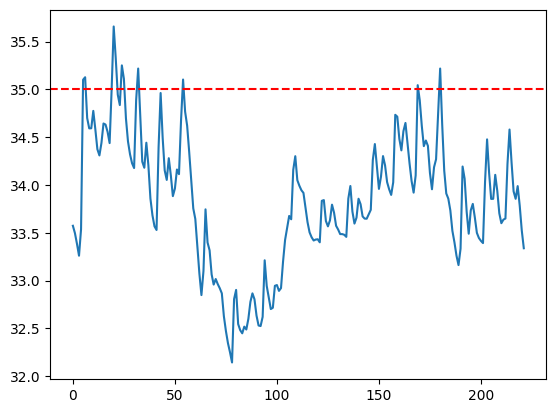

In [108]:
data.iloc[:400,8].plot()
plt.axhline(y=min_peak_height, color='r', linestyle='--') 

## 人工修正數字(上面結果不理想需要才執行)

In [70]:
data = pd.read_csv("P1-V6.csv") #匯入資料
bvp_signal= data["A : HR/BVP"] #選取胸式呼吸值
x = find_peaks(data.iloc[:,8],35)

## 跑數據

In [109]:
result = []
result2 = []
tmp = 0
idx = 0
while idx < len(x[0]):
    try:
        g = x[0][idx+1] - x[0][idx]
        g = g * 0.0625
        result2.append(g)
        heart_rate = 60 / g
        result.append(heart_rate)
    except:
        result2.append(g)
        result.append(np.nan)
    idx += 1
    

In [110]:
sorted_result = sorted(result)
n = len(result)

if n % 2 == 0:
    m1 = sorted_result[n//2 -1]
    m2 = sorted_result[n//2]
    med = (m1 + m2)/2
else:
    med = sorted_result[n//2]
    
threshold = 15
med_p = med + threshold
med_m = med - threshold

print(f'中位數是{med}, 合理數值最高是{med_p}, 最低是{med_m}')

中位數是87.27272727272727, 合理數值最高是102.27272727272727, 最低是72.27272727272727


In [111]:
x_list = list(x)
x0_list = list(x_list[0])
x1_list = list(x_list[1]['peak_heights'])

for i,val in enumerate(result):
    if val > med_p:
        del result[i]
        del result2[i]
        del x0_list[i]
        del x1_list[i]
    elif val < med_m:
        del result[i]
        del result2[i]
        del x0_list[i]
        del x1_list[i]

In [112]:
dataFrame = {"Heart_rate" :result,"peak":x0_list,"diff":result2,'peak_heights':x1_list}
df = pd.DataFrame(dataFrame)

In [113]:
df.to_csv("大家好我心率啦2.0.csv",index=False)

# 廢物們

In [ ]:
len(x[0])

In [ ]:
data.info()

In [ ]:
data.describe().T

In [ ]:
data.head()

In [ ]:
data.iloc[:1200,8].plot()

In [ ]:
df

In [89]:
fs = 16

In [90]:
b, a = signal.butter(2, 0.5, 'highpass', fs=fs)
filtered_bvp = signal.filtfilt(b, a, bvp_signal)

In [91]:
filtered_bvp

array([ 0.01264144, -0.26088896, -0.43262625, ...,  1.60907001,
        1.03972806,  0.45269083])

In [92]:
peaks, _ = find_peaks(filtered_bvp, height=0.9)

In [93]:
rr_intervals = np.diff(peaks) / fs

In [94]:
heart_rates = 60 / rr_intervals

In [95]:
print("RR intervals:", rr_intervals)
print("Heart rates:", heart_rates)

RR intervals: [0.8125 0.8125 0.1875 0.5625 0.8125 1.375  0.625  0.6875 0.6875 2.375
 0.9375 0.875  0.9375 0.875  0.8125 0.8125 0.8125 0.8125 0.8125 0.875
 0.8125 0.875  0.875  0.8125 0.9375 0.875  0.8125 0.9375 0.875  0.9375
 0.875  0.9375 0.8125 0.9375 0.875  0.9375 0.75   0.75   0.8125 0.8125
 0.9375 2.5    3.     3.5625 1.6875 0.75   5.9375 1.6875 1.     1.
 1.     1.     1.     0.9375 0.9375 0.9375 0.9375 0.875  7.9375 0.9375
 1.     0.9375 0.9375 0.8125 0.8125 0.8125 0.75   0.875  0.9375 0.9375
 1.     0.9375 0.9375 0.9375 0.9375 0.875  0.9375 0.9375 1.     0.9375
 0.9375 0.9375 1.     0.9375 0.9375 0.9375 0.9375 0.9375 0.875  1.
 1.     1.     6.     0.9375 1.     1.     0.9375 0.875  0.875  0.8125
 1.625  0.8125 2.5    0.8125 0.875  0.8125 0.8125 1.     0.875  0.9375
 1.     0.9375 0.9375 0.9375 0.875  0.875  0.875  0.9375 0.875  0.9375
 0.9375 1.     0.9375 0.875  0.9375 0.75   0.8125 0.875  0.75   0.875
 0.8125 0.8125 0.875  0.75   0.8125 0.875  0.875  0.875  0.875  0.75
 0.75